In [ ]:
# create folder and download data

!mkdir -p ./example
!wget https://cloud.tsinghua.edu.cn/f/0879710e189540cb9c3e/?dl=1 -O ./example/example.yaml
!wget https://cloud.tsinghua.edu.cn/f/2a36addf4aa44254915f/?dl=1 -O ./example/s20train-test.hdf5
!wget https://cloud.tsinghua.edu.cn/f/8c0cc5c1ae1e4c1da87d/?dl=1 -O ./example/s20train-train.hdf5

--2025-03-11 12:39:07--  https://cloud.tsinghua.edu.cn/f/0879710e189540cb9c3e/?dl=1
Resolving cloud.tsinghua.edu.cn (cloud.tsinghua.edu.cn)... 101.6.15.69, 2402:f000:1:402:101:6:15:69
Connecting to cloud.tsinghua.edu.cn (cloud.tsinghua.edu.cn)|101.6.15.69|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cloud.tsinghua.edu.cn/seafhttp/files/bafb2e5a-f700-45e4-ad99-df09569a474f/example.yaml [following]
--2025-03-11 12:39:07--  https://cloud.tsinghua.edu.cn/seafhttp/files/bafb2e5a-f700-45e4-ad99-df09569a474f/example.yaml
Reusing existing connection to cloud.tsinghua.edu.cn:443.
HTTP request sent, awaiting response... 200 OK
Length: 958 [application/octet-stream]
Saving to: ‘./example/example.yaml’

./example/example.y 100%[===================>]     958  --.-KB/s    in 0.02s   

2025-03-11 12:39:07 (46.1 KB/s) - ‘./example/example.yaml’ saved [958/958]

--2025-03-11 12:39:07--  https://cloud.tsinghua.edu.cn/f/2a36addf4aa44254915f/?dl=1
Resolving cloud.

In [1]:
command = "python main.py --cfg ./example/example.yaml"

In [2]:
import sys

In [3]:
import subprocess

try:
    output = subprocess.check_output(['python', 'main.py', '--cfg', './example/example.yaml'], text=True)
    print(output)
except subprocess.CalledProcessError as e:
    print(f"命令执行失败: {e.stderr}")

=> merge config form ./example/example.yaml
successfully loaded 709270 data from 709404 data, success rate: 99.98111090436478%
25/25 KDTrees constructed
successfully loaded 9998 data from 10000 data, success rate: 99.98%
computing pdf: 100%|██████████| 9998/9998 [00:10<00:00, 977.46it/s] 


In [4]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import frankenz as fz

In [6]:
data = h5py.File('./example/out/result.hdf5', 'r')

In [7]:
fit_wt = np.array(data['result/fit_wt'])
Nneighbors = np.array(data['result/Nneighbors'])
neighbors = np.array(data['result/neighbors'])
model_redshift = np.array(data['model/z'])
model_redshift_err = np.array(data['model/zerr'])

In [8]:
from frankenz.pdf import gauss_kde

In [ ]:
# zgrid

zgrid = np.arange(0, 7, 0.01)

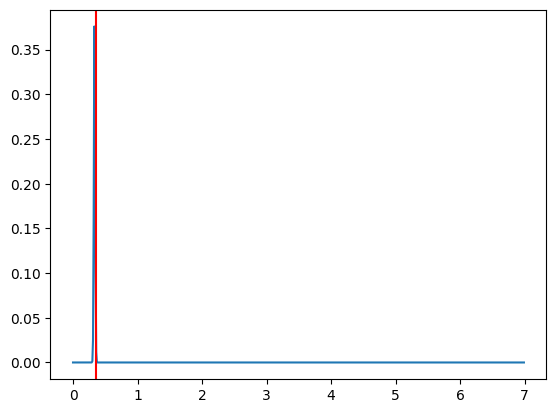

In [ ]:
# show pdf for one observation

idx = 4

plt.plot(zgrid, list(data['result/pdf'])[idx])
plt.axvline(data['result/z'][idx], color='red')

In [15]:
from frankenz4DESI.utils import pdfs_summarize

In [ ]:
# different statistics based on pdf

(pmean, pmean_std, pmean_conf, pmean_risk), \
(pmed, pmed_std, pmed_conf, pmed_risk), \
(pmode, pmode_std, pmode_conf, pmode_risk), \
(pbest, pbest_std, pbest_conf, pbest_risk), \
(plow2, plow1, phigh1, phigh2), \
pmc = pdfs_summarize(np.array(data['result/pdf']), zgrid)

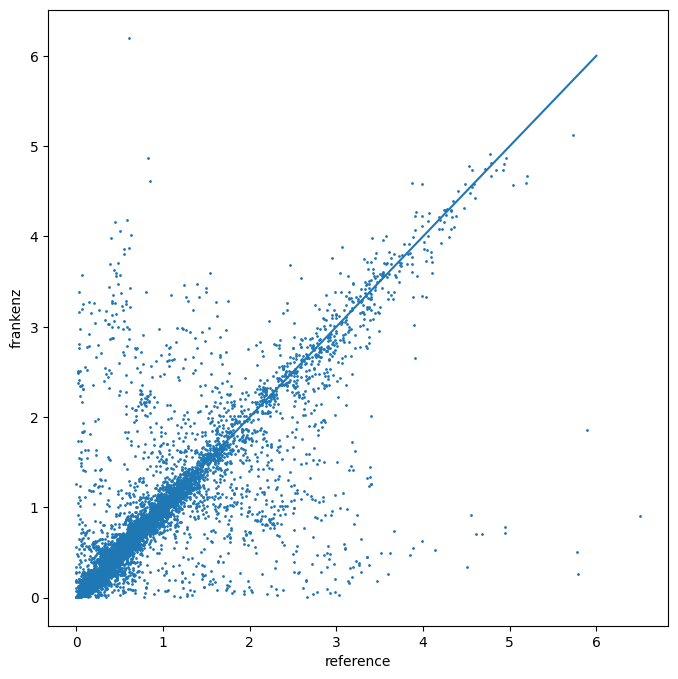

In [ ]:
# results

plt.figure(figsize=(8, 8))
plt.scatter(list(data['result/z']), pbest, s=1)
plt.xlabel('reference')
plt.ylabel('frankenz')
plt.plot(range(0, 7), range(0, 7))